In [1]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [97]:
tokenizer_fr = AutoTokenizer.from_pretrained("ulrichING/bert-base-sentiment-analysis-french")
model_fr = AutoModelForSequenceClassification.from_pretrained("ulrichING/bert-base-sentiment-analysis-french")

In [98]:
tokenizer_multi_lang = AutoTokenizer.from_pretrained("tabularisai/multilingual-sentiment-analysis")
model_multi_lang = AutoModelForSequenceClassification.from_pretrained("tabularisai/multilingual-sentiment-analysis")

In [99]:
tokenizer_multi_lang_unca = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model_multi_lang_unca = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [100]:
column_names = ['class', 'id', 'date', 'query', 'name', 'tweet']
df = pd.read_csv("dataSet140.csv", sep=',', encoding='ISO-8859-1',names=column_names)

In [101]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

Training set shape: (1120000, 6)
Test set shape: (480000, 6)


In [102]:
testFr_df = pd.read_csv("sentiment140_fr_2000.csv")

Test du model bert-base-sentiment-analysis-french

In [103]:
def tweet_test_fr(logits):
    rep = logits.tolist()
    rep = rep[0]
    indice_max = rep.index(max(rep)) + 1
    if indice_max == 1 :
        return 0
    else :
        return 4

In [104]:
def cleanText(text):
    clean_text = re.sub(r'@\w+|http\S+', '', text)
    return clean_text.strip()

In [105]:
def test_fr_modelFR(df):
    count = 0
    df_cleaned = df.loc[:, "tweet_fr"] = df["tweet_fr"].apply(cleanText)
    ans = []
    for item in df_cleaned:
        text = item
        inputs = tokenizer_fr(text, return_tensors="pt")

        with torch.no_grad():
            outputs = model_fr(**inputs)

        logits = outputs.logits
        predicted_class = torch.argmax(logits).item()

        print(text)
        print(f"Raw logits: {logits}")
        print(f"Predicted sentiment class: {predicted_class + 1} (1 = worst, 2 = best)")
        count+=1
        print(count)
        ans.append(tweet_test_fr(logits))
    return ans

In [106]:
def test_eng_modelFR(df):
    count = 0
    df_cleaned = df.loc[:, "tweet"] = df["tweet"].apply(cleanText)
    ans = []
    for item in df_cleaned:
        text = item
        inputs = tokenizer_fr(text, return_tensors="pt")

        with torch.no_grad():
            outputs = model_fr(**inputs)

        logits = outputs.logits
        predicted_class = torch.argmax(logits).item()

        print(text)
        print(f"Raw logits: {logits}")
        print(f"Predicted sentiment class: {predicted_class + 1} (1 = worst, 2 = best)")
        count+=1
        print(count)
        ans.append(tweet_test_fr(logits))
    return ans

In [107]:
ansFR_modelFR = test_fr_modelFR(testFr_df[:1000])

Vous devriez avoir David Carr du troisième jour pour le faire. ;D
Raw logits: tensor([[ 1.0067, -1.2613]])
Predicted sentiment class: 1 (1 = worst, 2 = best)
1
est contrarié qu'il ne puisse pas mettre à jour son Facebook en le texto... et pourrait pleurer en conséquence École aujourd'hui aussi.
Raw logits: tensor([[ 0.7369, -0.9678]])
Predicted sentiment class: 1 (1 = worst, 2 = best)
2
J'ai plongé plusieurs fois pour la balle. A réussi à économiser 50% Le reste sort des limites
Raw logits: tensor([[ 1.3650, -1.5849]])
Predicted sentiment class: 1 (1 = worst, 2 = best)
3
Tout mon corps se sent démangeant et comme sur le feu
Raw logits: tensor([[-0.4242,  0.2913]])
Predicted sentiment class: 2 (1 = worst, 2 = best)
4
Non, ça ne se passe pas du tout. Je suis en colère. Pourquoi suis-je ici ? Parce que je ne peux pas te voir partout.
Raw logits: tensor([[ 2.1246, -2.2530]])
Predicted sentiment class: 1 (1 = worst, 2 = best)
5
pas toute l'équipage
Raw logits: tensor([[ 1.0247, -1.4003]])
P

In [108]:
ans1 = 0
for actual, predicted in zip(testFr_df["class"], ansFR_modelFR):
    if actual == predicted:
        ans1 += 1

accuracy1 = ans1 / testFr_df[:1000].shape[0]
print(accuracy1)


0.95


In [109]:
ans_eng_modelFR = test_eng_modelFR(test_df[:1000])

AHHH I HOPE YOUR OK!!!
Raw logits: tensor([[ 1.2446, -1.5855]])
Predicted sentiment class: 1 (1 = worst, 2 = best)
1
cool , i have no tweet apps  for my razr 2
Raw logits: tensor([[ 0.4994, -0.6734]])
Predicted sentiment class: 1 (1 = worst, 2 = best)
2
i know  just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u
Raw logits: tensor([[ 0.3164, -0.5701]])
Predicted sentiment class: 1 (1 = worst, 2 = best)
3
School email won't open  and I have geography stuff on there to revise! *Stupid School* :'(
Raw logits: tensor([[ 0.0845, -0.0549]])
Predicted sentiment class: 1 (1 = worst, 2 = best)
4
upper airways problem
Raw logits: tensor([[ 1.3515, -1.6556]])
Predicted sentiment class: 1 (1 = worst, 2 = best)
5
Going to miss Pastor's sermon on Faith...
Raw logits: tensor([[ 0.7099, -0.6957]])
Predicted sentiment class: 1 (1 = worst, 2 = best)
6
on lunch....dj should come eat with me
Raw logits: tensor([[ 0.7886, -0.9782]])
Predicted

In [110]:
ans2 = 0
for actual, predicted in zip(testFr_df["class"], ans_eng_modelFR):
    if actual == predicted:
        ans2 += 1

accuracy2 = ans2 / test_df[:1000].shape[0]
print(accuracy2)

0.908


In [111]:
def affichage(ans1, ans2):
    labels = ['test français', 'test anglais']
    values = [ans1, ans2]

    plt.bar(labels, values, color=['blue', 'red'])

    plt.title('Comparison')
    plt.xlabel('Values')
    plt.ylabel('%')

    plt.ylim(0, 1)

    plt.show()

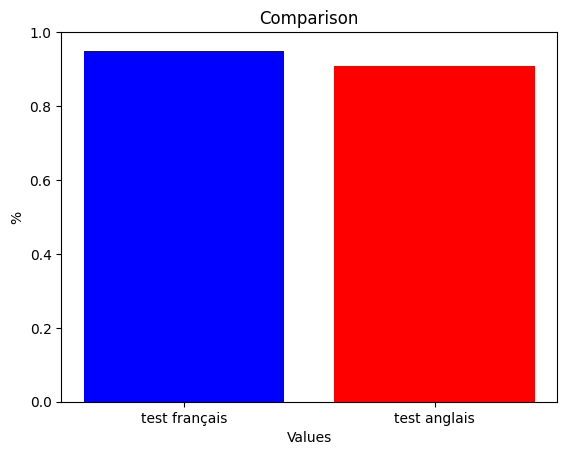

In [112]:
affichage(accuracy1, accuracy2)

Test du model multilingual-sentiment-analysis

In [113]:
def tweet_test_multilang(logits):
    rep = logits.tolist()
    rep = rep[0]
    indice_max = rep.index(max(rep)) + 1
    if 0<= indice_max <= 2 :
        return 0
    else :
        return 4

In [114]:
def test_multilang_eng(df):
    count = 0
    df_cleaned = df.loc[:, "tweet"] = df["tweet"].apply(cleanText)
    ans = []
    for item in df_cleaned:
        text = item
        inputs = tokenizer_multi_lang(text, return_tensors="pt")

        with torch.no_grad():
            outputs = model_multi_lang(**inputs)

        logits = outputs.logits
        predicted_class = torch.argmax(logits).item()

        print(text)
        print(f"Raw logits: {logits}")
        print(f"Predicted sentiment class: {predicted_class + 1} (1 = worst, 5 = best)")
        count+=1
        print(count)
        ans.append(tweet_test_multilang(logits))
    return ans

In [115]:
def test_multilang_fr(df):
    count = 0
    df_cleaned = df.loc[:, "tweet_fr"] = df["tweet_fr"].apply(cleanText)
    ans = []
    for item in df_cleaned:
        text = item
        inputs = tokenizer_multi_lang(text, return_tensors="pt")

        with torch.no_grad():
            outputs = model_multi_lang(**inputs)

        logits = outputs.logits
        predicted_class = torch.argmax(logits).item()

        print(text)
        print(f"Raw logits: {logits}")
        print(f"Predicted sentiment class: {predicted_class + 1} (1 = worst, 5 = best)")
        count+=1
        print(count)
        ans.append(tweet_test_multilang(logits))
    return ans

In [116]:
ansFR_modelMulti = test_multilang_fr(testFr_df[:1000])
ans_eng_modelMulti = test_multilang_eng(test_df[:1000])

Vous devriez avoir David Carr du troisième jour pour le faire. ;D
Raw logits: tensor([[-0.6457, -0.1146,  0.7438,  0.3166, -1.0493]])
Predicted sentiment class: 3 (1 = worst, 5 = best)
1
est contrarié qu'il ne puisse pas mettre à jour son Facebook en le texto... et pourrait pleurer en conséquence École aujourd'hui aussi.
Raw logits: tensor([[-0.0826,  0.1405,  0.3635, -0.3787, -0.8742]])
Predicted sentiment class: 3 (1 = worst, 5 = best)
2
J'ai plongé plusieurs fois pour la balle. A réussi à économiser 50% Le reste sort des limites
Raw logits: tensor([[-0.2295,  0.3411,  0.6696,  0.1232, -1.7044]])
Predicted sentiment class: 3 (1 = worst, 5 = best)
3
Tout mon corps se sent démangeant et comme sur le feu
Raw logits: tensor([[ 2.1687,  0.8047, -1.0522, -1.3459, -1.1964]])
Predicted sentiment class: 1 (1 = worst, 5 = best)
4
Non, ça ne se passe pas du tout. Je suis en colère. Pourquoi suis-je ici ? Parce que je ne peux pas te voir partout.
Raw logits: tensor([[ 1.2179,  0.5169,  0.2013, -

In [117]:
ans1 = 0
for actual, predicted in zip(testFr_df["class"], ansFR_modelMulti):
    if actual == predicted:
        ans1 += 1

accuracy1 = ans1 / testFr_df[:1000].shape[0]
print(accuracy1)


0.542


In [118]:
ans2 = 0
for actual, predicted in zip(test_df["class"], ans_eng_modelMulti):
    if actual == predicted:
        ans2 += 1

accuracy2 = ans2 / test_df[:1000].shape[0]
print(accuracy2)

0.664


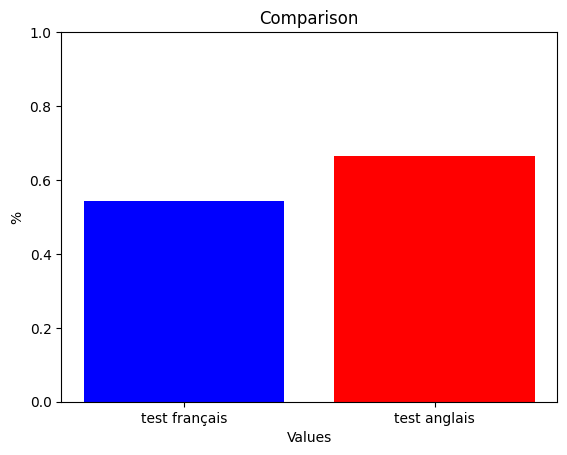

In [119]:
affichage(accuracy1, accuracy2)


Test du model bert-base-multilingual-uncased-sentiment

In [120]:
def tweet_test_uncased(logits):
    rep = logits.tolist()
    rep = rep[0]
    indice_max = rep.index(max(rep)) + 1
    if 0<= indice_max <= 2 :
        return 0
    else :
        return 4

In [121]:
def test_uncased_eng(df):
    count = 0
    df_cleaned = df.loc[:, "tweet"] = df["tweet"].apply(cleanText)
    ans = []
    for item in df_cleaned:
        text = item
        inputs = tokenizer_multi_lang_unca(text, return_tensors="pt")

        with torch.no_grad():
            outputs = model_multi_lang_unca(**inputs)

        logits = outputs.logits
        predicted_class = torch.argmax(logits).item()

        '''print(text)
        print(f"Raw logits: {logits}")
        print(f"Predicted sentiment class: {predicted_class + 1} (1 = worst, 5 = best)")'''
        count+=1
        print(count)
        ans.append(tweet_test_uncased(logits))
    return ans

In [122]:
def test_uncased_fr(df):
    count = 0
    df_cleaned = df.loc[:, "tweet_fr"] = df["tweet_fr"].apply(cleanText)
    ans = []
    for item in df_cleaned:
        text = item
        inputs = tokenizer_multi_lang_unca(text, return_tensors="pt")

        with torch.no_grad():
            outputs = model_multi_lang_unca(**inputs)

        logits = outputs.logits
        predicted_class = torch.argmax(logits).item()

        print(text)
        print(f"Raw logits: {logits}")
        print(f"Predicted sentiment class: {predicted_class + 1} (1 = worst, 5 = best)")
        count+=1
        print(count)
        ans.append(tweet_test_uncased(logits))
    return ans

In [123]:
ansFR_model_unca = test_uncased_fr(testFr_df[:1000])
ans_eng_model_unca = test_uncased_eng(test_df[:1000])

Vous devriez avoir David Carr du troisième jour pour le faire. ;D
Raw logits: tensor([[-0.0592, -0.0738,  0.1846,  0.0284,  0.0266]])
Predicted sentiment class: 3 (1 = worst, 5 = best)
1
est contrarié qu'il ne puisse pas mettre à jour son Facebook en le texto... et pourrait pleurer en conséquence École aujourd'hui aussi.
Raw logits: tensor([[ 1.7444,  2.0487,  1.1369, -1.2899, -2.7531]])
Predicted sentiment class: 2 (1 = worst, 5 = best)
2
J'ai plongé plusieurs fois pour la balle. A réussi à économiser 50% Le reste sort des limites
Raw logits: tensor([[ 2.1218,  1.8532,  0.4872, -1.5791, -2.2532]])
Predicted sentiment class: 1 (1 = worst, 5 = best)
3
Tout mon corps se sent démangeant et comme sur le feu
Raw logits: tensor([[ 1.2276,  1.2339,  0.3354, -1.1528, -1.3035]])
Predicted sentiment class: 2 (1 = worst, 5 = best)
4
Non, ça ne se passe pas du tout. Je suis en colère. Pourquoi suis-je ici ? Parce que je ne peux pas te voir partout.
Raw logits: tensor([[ 3.4666,  2.2021,  0.2478, -

In [124]:
ans1 = 0
for actual, predicted in zip(testFr_df["class"], ansFR_model_unca):
    if actual == predicted:
        ans1 += 1

accuracy1 = ans1 / testFr_df[:1000].shape[0]
print(accuracy1)


0.588


In [125]:
ans2 = 0
for actual, predicted in zip(test_df["class"], ans_eng_model_unca):
    if actual == predicted:
        ans2 += 1

accuracy2 = ans2 / test_df[:1000].shape[0]
print(accuracy2)

0.699


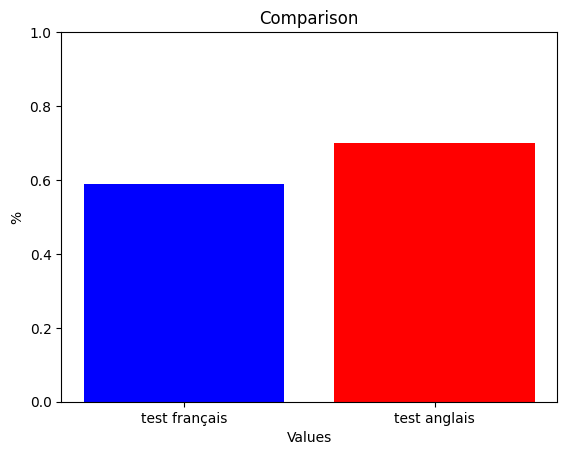

In [126]:
affichage(accuracy1, accuracy2)
